In [1]:
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
def load_data():
    wine = load_wine()
    # print(wine.data.shape)
    win_data = pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)
    # print(win_data.head())

    x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
    return x_train, y_train, x_test, y_test


def build_model():
    clf = tree.DecisionTreeClassifier(criterion="entropy")
    return clf

In [9]:
feature_name = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜 色强度', '色调', 'od280/od315稀释葡萄酒',
                    '脯氨酸']

In [5]:
def plot_tree(model):
    dot_data = tree.export_graphviz(model,
                                     feature_names=feature_name,
                                     class_names=["琴酒","雪莉","贝尔摩德"],
                                     filled=True,
                                     rounded=True)
    graph = graphviz.Source(dot_data)
    return graph

0.9629629629629629


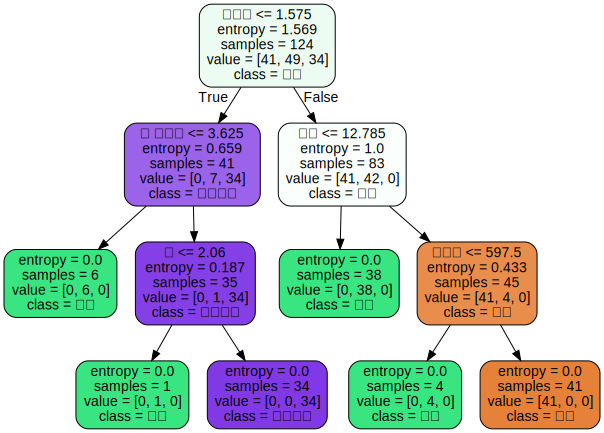

In [6]:
x_train, y_train, x_test, y_test = load_data()
model = build_model()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

graph = plot_tree(model)
graph

In [7]:
model.feature_importances_

array([0.32645729, 0.        , 0.03367064, 0.        , 0.        ,
       0.        , 0.43450751, 0.        , 0.        , 0.10527647,
       0.        , 0.        , 0.10008808])

In [11]:
[*zip(feature_name,model.feature_importances_)]

[('酒精', 0.32645729083045),
 ('苹果酸', 0.0),
 ('灰', 0.03367064414238504),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.434507510099587),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜 色强度', 0.10527647173116578),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.10008808319641227)]

In [1]:
model = tree.DecisionTreeClassifier(criterion="entropy", random_state=30)
model = model.fit(x_train, y_train)
score = model.score(x_test, y_test)
score

NameError: name 'tree' is not defined